## **GRIP : THE SPARKS FOUNDATION**

## **AUTHOR : Sonali Panigrahi**

## PREDICTION USING DECISION TREE ALGORITHM
PURPOSE : IF WE FEED ANY NEW DATA TO THIS CLASSIFIER, IT WOULD BE ABLE TO PREDICT THE RIGHT CLASS ACCORDINGLY

## **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## **LOADING AND READING THE DATASET**

In [ ]:
data=pd.read_csv("/content/Iris.csv")
print('Data Read successfully')
data.head(10)

Data Read successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## **UNDERSTANDING THE DATA ATTRIBUTES**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.shape

(150, 6)

## **CHECKING FOR NULL VALUES**

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

## **CONVERTING THE CATEGORICAL COLUMNS**

In [ ]:
le=LabelEncoder()
data['Species']=le.fit_transform(data.iloc[:,-1])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


## **VISUALIZING THE DATASET**

In [ ]:
data.value_counts("Species")

Species
0    50
1    50
2    50
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

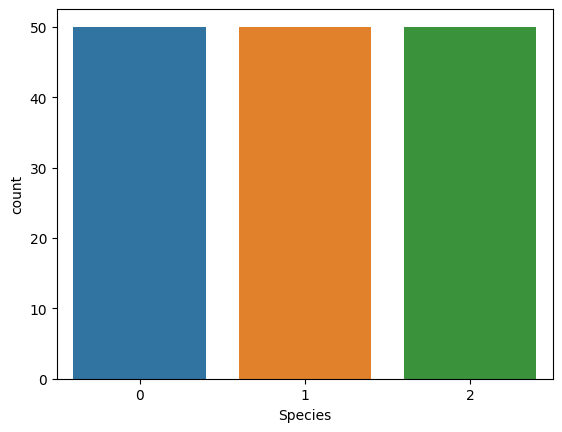

In [ ]:
sns.countplot(x='Species',data=data)
plt.show

## **SPLITTING THE DATASET INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [ ]:
x=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=data['Species']

In [ ]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

## **DIVIDING THE DATASET INTO TRAINING AND TEST SET**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
x_train.shape

(105, 4)

In [ ]:
x_test.shape

(45, 4)

## **FITTING THE DECISION TREE ALGORITHM**

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

## **VISUALIZATION OF MODEL**

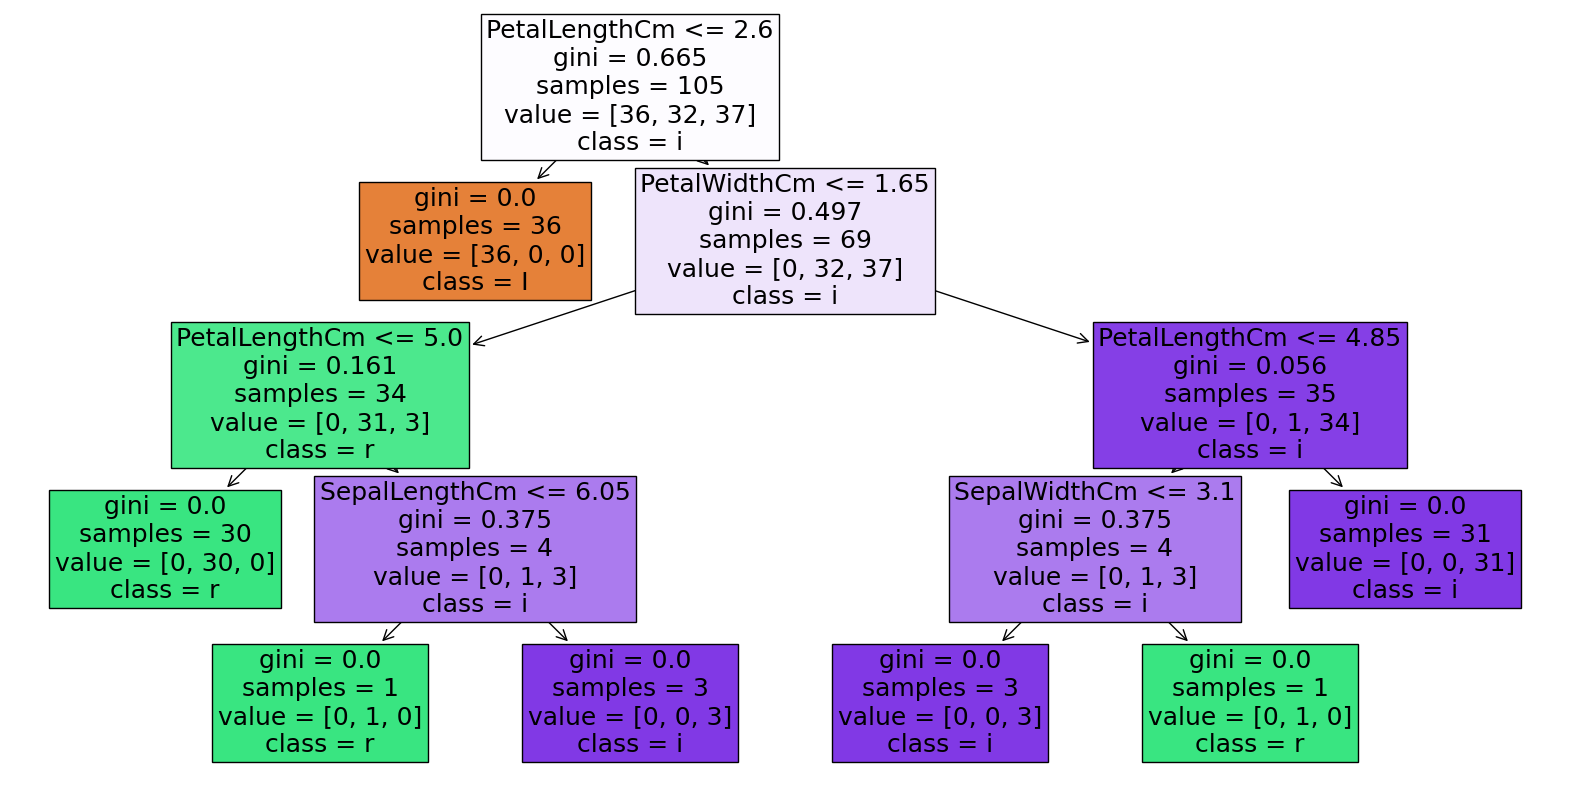

In [ ]:
plt.figure(figsize=(20,10))
visual=tree.plot_tree(model,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
                      class_names='Iris',filled=True,fontsize=18)

## **PREDICTING THE VALUES**

In [ ]:
y_pred=model.predict(x_test)
y_pred
y_pred=y_pred.reshape(-1,1)

## **CALCULATING MODEL ACCURACY SCORE**

In [ ]:
score=model.score(x_train,y_train)
score

1.0

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## **PREDICTING THE CLASS BY INPUT**

In [ ]:
input=[[5.4,3.9,1.7,0.4]]
result=model.predict(input)
result

array([0])

### **CONCLUSION : IF WE FEED ANY NEW INPUT TO THIS DECISION TREE CLASSIFIER MODEL , IT IS PREDICTING CORRECT CLASS OF IRIS DATASET.**
